In [34]:
import plotly
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('time_series_covid19_deaths_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/22,3/28/22,3/29/22,3/30/22,3/31/22,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7662,7663,7665,7667,7670,7670,7671,7671,7671,7671
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3491,3491,3492,3492,3492,3492,3492,3492,3492,3492
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6873,6873,6874,6874,6874,6874,6874,6874,6874,6874
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 809 entries, Province/State to 4/5/22
dtypes: float64(2), int64(805), object(2)
memory usage: 1.8+ MB


In [37]:
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/27/22,3/28/22,3/29/22,3/30/22,3/31/22,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22
count,282.000000,282.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,20.106368,21.958718,0.059859,0.063380,0.091549,0.147887,0.197183,0.288732,0.461268,0.468310,...,21565.355634,21579.433099,21596.169014,21613.908451,21630.799296,21646.735915,21656.105634,21661.890845,21672.193662,21686.313380
std,25.841453,75.893366,1.008764,1.010299,1.426181,2.374622,3.087051,4.510813,7.417526,7.418036,...,85436.157558,85486.869372,85544.553818,85611.377601,85653.235226,85704.502195,85724.560180,85733.238932,85764.095484,85803.043476
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.643279,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,38.000000,38.750000,38.750000,40.250000,41.000000,41.000000,41.000000,41.000000,41.750000,41.750000
50%,21.607878,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,813.500000,816.500000,816.500000,816.500000,816.500000,816.500000,816.500000,816.500000,816.500000,816.500000
75%,40.950592,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7787.500000,7789.000000,7790.750000,7821.500000,7911.250000,8001.250000,8088.250000,8170.500000,8194.500000,8210.750000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,976963.000000,977948.000000,978909.000000,980130.000000,980638.000000,981450.000000,981612.000000,981644.000000,982099.000000,982576.000000


In [38]:
covid_df_last_week_columns =df.iloc[:,-8:].columns.to_list() 
covid_df_last_week_by_countries = df.iloc[:,[1]+[*range(-8,0,1)]] 
topdata=covid_df_last_week_by_countries.nlargest(n=10, columns=['3/29/22'])
print(topdata)


     Country/Region  3/29/22  3/30/22  3/31/22  4/1/22  4/2/22  4/3/22  \
256              US   978909   980130   980638  981450  981612  981644   
31           Brazil   659508   659769   660022  660265  660371  660410   
148           India   521101   521129   521181  521264  521345  521358   
218          Russia   360674   361014   361348  361679  362008  362304   
184          Mexico   322845   322845   323016  323127  323212  323223   
212            Peru   212157   212207   212207  212256  212299  212328   
273  United Kingdom   164974   165187   165379  165570  165570  165570   
154           Italy   159054   159224   159383  159537  159666  159784   
149       Indonesia   154882   155000   155089  155164  155164  155164   
150            Iran   140109   140158   140204  140240  140277  140315   

     4/4/22  4/5/22  
256  982099  982576  
31   660570  660786  
148  521416  521487  
218  362581  362890  
184  323235  323318  
212  212354  212372  
273  165780  166148  
154  1599

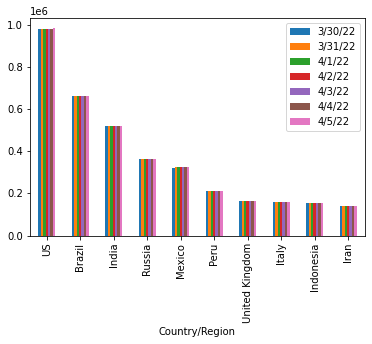

In [39]:
topdata.plot(x="Country/Region", y=["3/30/22", "3/31/22", "4/1/22","4/2/22","4/3/22","4/4/22","4/5/22"], kind="bar")